In [29]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
# calculate accuracy measures and confusion matrix/f1 score
from sklearn import metrics
from sklearn.metrics import f1_score
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
headers = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.names"
# Making a list of missing value types this way we can find missing values other than na and null, like any special characters 
missing_values = ["n/a", "na", "--","","?"]

#### Attribute Information:

#### Matrix column entries (attributes):
##### name - ASCII subject name and recording number
##### MDVP:Fo(Hz) - Average vocal fundamental frequency
##### MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
##### MDVP:Flo(Hz) - Minimum vocal fundamental frequency
##### MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
##### MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
##### NHR,HNR - Two measures of ratio of noise to tonal components in the voice
##### status - Health status of the subject (one) - Parkinson's, (zero) - healthy
##### RPDE,D2 - Two nonlinear dynamical complexity measures
##### DFA - Signal fractal scaling exponent
##### spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 

In [2]:
Parkinsons_df_orig = pd.read_csv(url,skipinitialspace=True, na_values = missing_values)
Parkinsons_df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [3]:
Parkinsons_df = pd.DataFrame.copy(Parkinsons_df_orig) # Working on the copy of the original
print ('The Parkinsons data has {0} rows and {1} columns'.format(Parkinsons_df.shape[0],Parkinsons_df.shape[1]))

The Parkinsons data has 195 rows and 24 columns


In [4]:
Parkinsons_df = Parkinsons_df.drop('name', axis=1) # drop ASCII Subject name or recording number
print ('Dropping the ASCII Subject name or recording number columns; this is unique column which does not help in modeling')

Dropping the ASCII Subject name or recording number columns; this is unique column which does not help in modeling


In [5]:
# Missing Values identification
x = Parkinsons_df.isna().sum().sum()
y = Parkinsons_df.isnull().sum().sum()
print ('The Parkinsons data has {} missing values and {} null values'.format(x,y))

The Parkinsons data has 0 missing values and 0 null values


In [6]:
print(Parkinsons_df.nunique()) # Total number of unique records

MDVP:Fo(Hz)         195
MDVP:Fhi(Hz)        195
MDVP:Flo(Hz)        195
MDVP:Jitter(%)      173
MDVP:Jitter(Abs)     19
MDVP:RAP            155
MDVP:PPQ            165
Jitter:DDP          180
MDVP:Shimmer        188
MDVP:Shimmer(dB)    149
Shimmer:APQ3        184
Shimmer:APQ5        189
MDVP:APQ            189
Shimmer:DDA         189
NHR                 185
HNR                 195
status                2
RPDE                195
DFA                 195
spread1             195
spread2             194
D2                  195
PPE                 195
dtype: int64


In [7]:
Parkinsons_df.describe().transpose() #descriptive Statistical analysis

count        mean        std         min         25%  \
MDVP:Fo(Hz)       195.0  154.228641  41.390065   88.333000  117.572000   
MDVP:Fhi(Hz)      195.0  197.104918  91.491548  102.145000  134.862500   
MDVP:Flo(Hz)      195.0  116.324631  43.521413   65.476000   84.291000   
MDVP:Jitter(%)    195.0    0.006220   0.004848    0.001680    0.003460   
MDVP:Jitter(Abs)  195.0    0.000044   0.000035    0.000007    0.000020   
MDVP:RAP          195.0    0.003306   0.002968    0.000680    0.001660   
MDVP:PPQ          195.0    0.003446   0.002759    0.000920    0.001860   
Jitter:DDP        195.0    0.009920   0.008903    0.002040    0.004985   
MDVP:Shimmer      195.0    0.029709   0.018857    0.009540    0.016505   
MDVP:Shimmer(dB)  195.0    0.282251   0.194877    0.085000    0.148500   
Shimmer:APQ3      195.0    0.015664   0.010153    0.004550    0.008245   
Shimmer:APQ5      195.0    0.017878   0.012024    0.005700    0.009580   
MDVP:APQ          195.0    0.024081   0.016947    0.007190    0.013080   
Shimmer:DDA       195.0    0.046993   0.030459    0.013640    0.024735   
NHR               195.0    0.024847   0.040418    0.000650    0.005925   
HNR               195.0   21.885974   4.425764    8.441000   19.198000   
status            195.0    0.753846   0.431878    0.000000    1.000000   
RPDE              195.0    0.498536   0.103942    0.256570    0.421306   
DFA               195.0    0.718099   0.055336    0.574282    0.674758   
spread1           195.0   -5.684397   1.090208   -7.964984   -6.450096   
spread2           195.0    0.226510   0.083406    0.006274    0.174351   
D2                195.0    2.381826   0.382799    1.423287    2.099125   
PPE               195.0    0.206552   0.090119    0.044539    0.137451   

                         50%         75%         max  
MDVP:Fo(Hz)       148.790000  182.769000  260.105000  
MDVP:Fhi(Hz)      175.829000  224.205500  592.030000  
MDVP:Flo(Hz)      104.315000  140.018500  239.170000  
MDVP:Jitter(%)      0.004940    0.007365    0.033160  
MDVP:Jitter(Abs)    0.000030    0.000060    0.000260  
MDVP:RAP            0.002500    0.003835    0.021440  
MDVP:PPQ            0.002690    0.003955    0.019580  
Jitter:DDP          0.007490    0.011505    0.064330  
MDVP:Shimmer        0.022970    0.037885    0.119080  
MDVP:Shimmer(dB)    0.221000    0.350000    1.302000  
Shimmer:APQ3        0.012790    0.020265    0.056470  
Shimmer:APQ5        0.013470    0.022380    0.079400  
MDVP:APQ            0.018260    0.029400    0.137780  
Shimmer:DDA         0.038360    0.060795    0.169420  
NHR                 0.011660    0.025640    0.314820  
HNR                22.085000   25.075500   33.047000  
status              1.000000    1.000000    1.000000  
RPDE                0.495954    0.587562    0.685151  
DFA                 0.722254    0.761881    0.825288  
spread1            -5.720868   -5.046192   -2.434031  
spread2             0.218885    0.279234    0.450493  
D2                  2.361532    2.636456    3.671155  
PPE                 0.194052    0.252980    0.527367

In [8]:
print(Parkinsons_df.skew(numeric_only = True, axis = 0))
print ('The positive values of Skew indicates Right-skewed distribution and negative values Left-Skewed distribution')

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64
The positive values of Skew indicates Right-skewed distribution and negative values Left-Skewed distribution


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

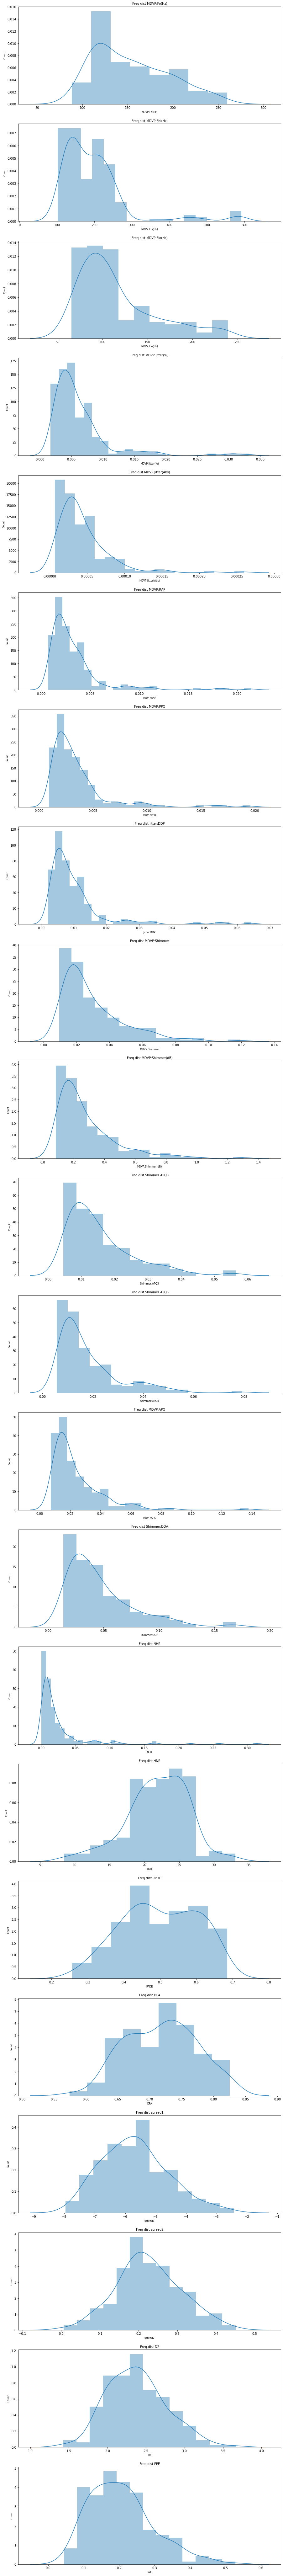

In [9]:
# plotting Univariate distribution using distplot and reading the independent variables dispersion
col_names = Parkinsons_df.select_dtypes(include=[np.float64]).columns
fig, ax = plt.subplots(len(col_names), figsize=(15,150))

for i, col_val in enumerate(col_names):

    sns.distplot(Parkinsons_df[col_val], kde = True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

In [10]:
# From the skeweness and above observations in the distribution
# The following independent attributes have Mean > Median,and is right-skewed distribution

# MDVP:Fo(Hz) - Average vocal fundamental frequency
# MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
# MDVP:Flo(Hz) - Minimum vocal fundamental frequency
# MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several  measures of variation in fundamental frequency
# MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
# NHR - Measure of ratio of noise to tonal components in the voice
# spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 
# D2 - Non-linear dynamical complexity measures

# The following independent attributes have mean < median, and is partially left-skewed
# HNR - Measure of ratio of noise to tonal components in the voice
# RPDE - Non-linear dynamical complexity measures
# DFA - Signal fractal scaling exponent

# Our target variable is Status -  Health status of the subject (one) - Parkinson's, (zero) - healthy
# 48(healthy); 147(parkinsons)

1    147
0     48
Name: status, dtype: int64


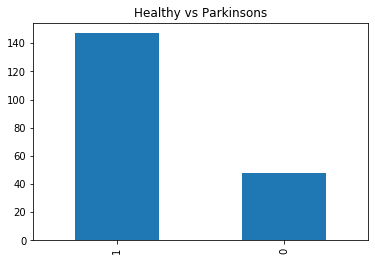

In [11]:
Parkinsons_df['status'].value_counts().plot.bar(title='Healthy vs Parkinsons') 
print(Parkinsons_df['status'].value_counts()) # 0 - Healthy(48) 1 - Parkinsons(147)

<IPython.core.display.Javascript object>

(23.0, 0.0)

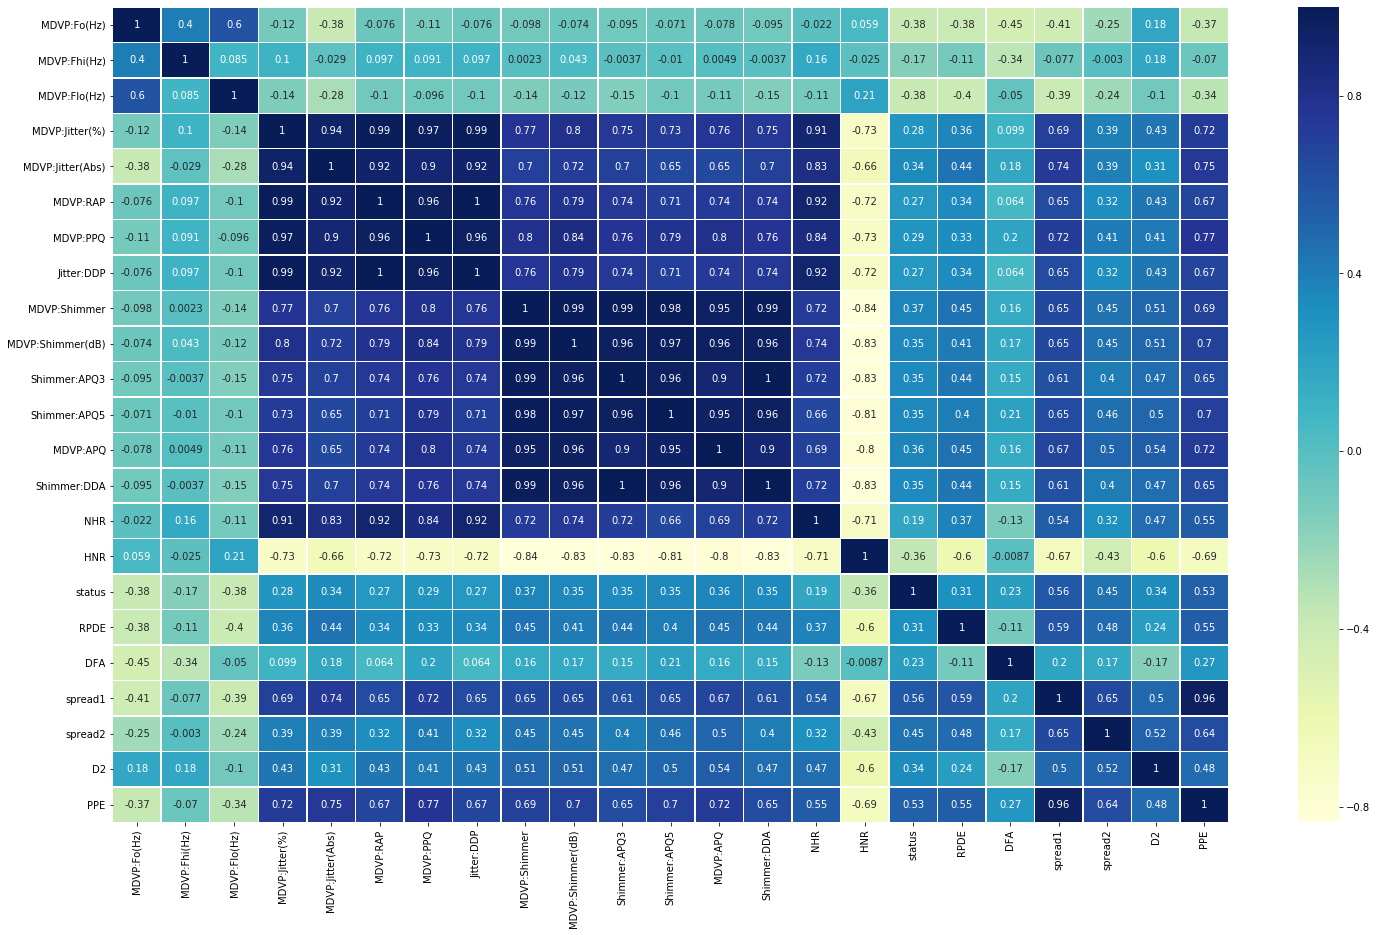

In [12]:
# Finding multi-collinearity - Bi-Variate Analysis
plt.figure(figsize=(25, 15))
ax = sns.heatmap(Parkinsons_df.corr(),annot = True, linewidths = 0.5, cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [13]:
# MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
# Jitter(%) has strong positive correlation with Jitter(abs), RAP, PPQ and DDP with R values of 0.94, 0.99,0.97 
# and 0.99 respectively

# MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
# MDVP:Shimmer has strong positive correlation with Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ and Shimmer:DDA with 
# r values 0.99,0.99,0.98,0.95 and 0.98 respectively

# Second set of Variables which has high-correlation coefficient
# NHR - Measure of ratio of noise to tonal components in the voice is postively correlated with the
# Several measures of variation in fundamental frequency i.e. Jitter(%), Jitter(abs), RAP, PPQ and DDP 
# with 0,91, 0.83, 0.92, 0.84 and 0.92 as measures

# spread1,PPE - Non-linear measures of fundamental frequency variation
# Multi-collinear with high correlation coefficient of 0.96

# Hence, the above set of independent attributes are multi-collinear and works counter-productive while 
# building model to predict Parkinsons

# We need domain expertise/advice to decide if a feature can be dropped while building the model to predict the subject

# Amplitude can be expressed as a function of frequency as below
# A=y(t)sin(2πft+ϕ) ; f - frequency ; A Amplitude; y(t)- sinewave as function of time; t- time

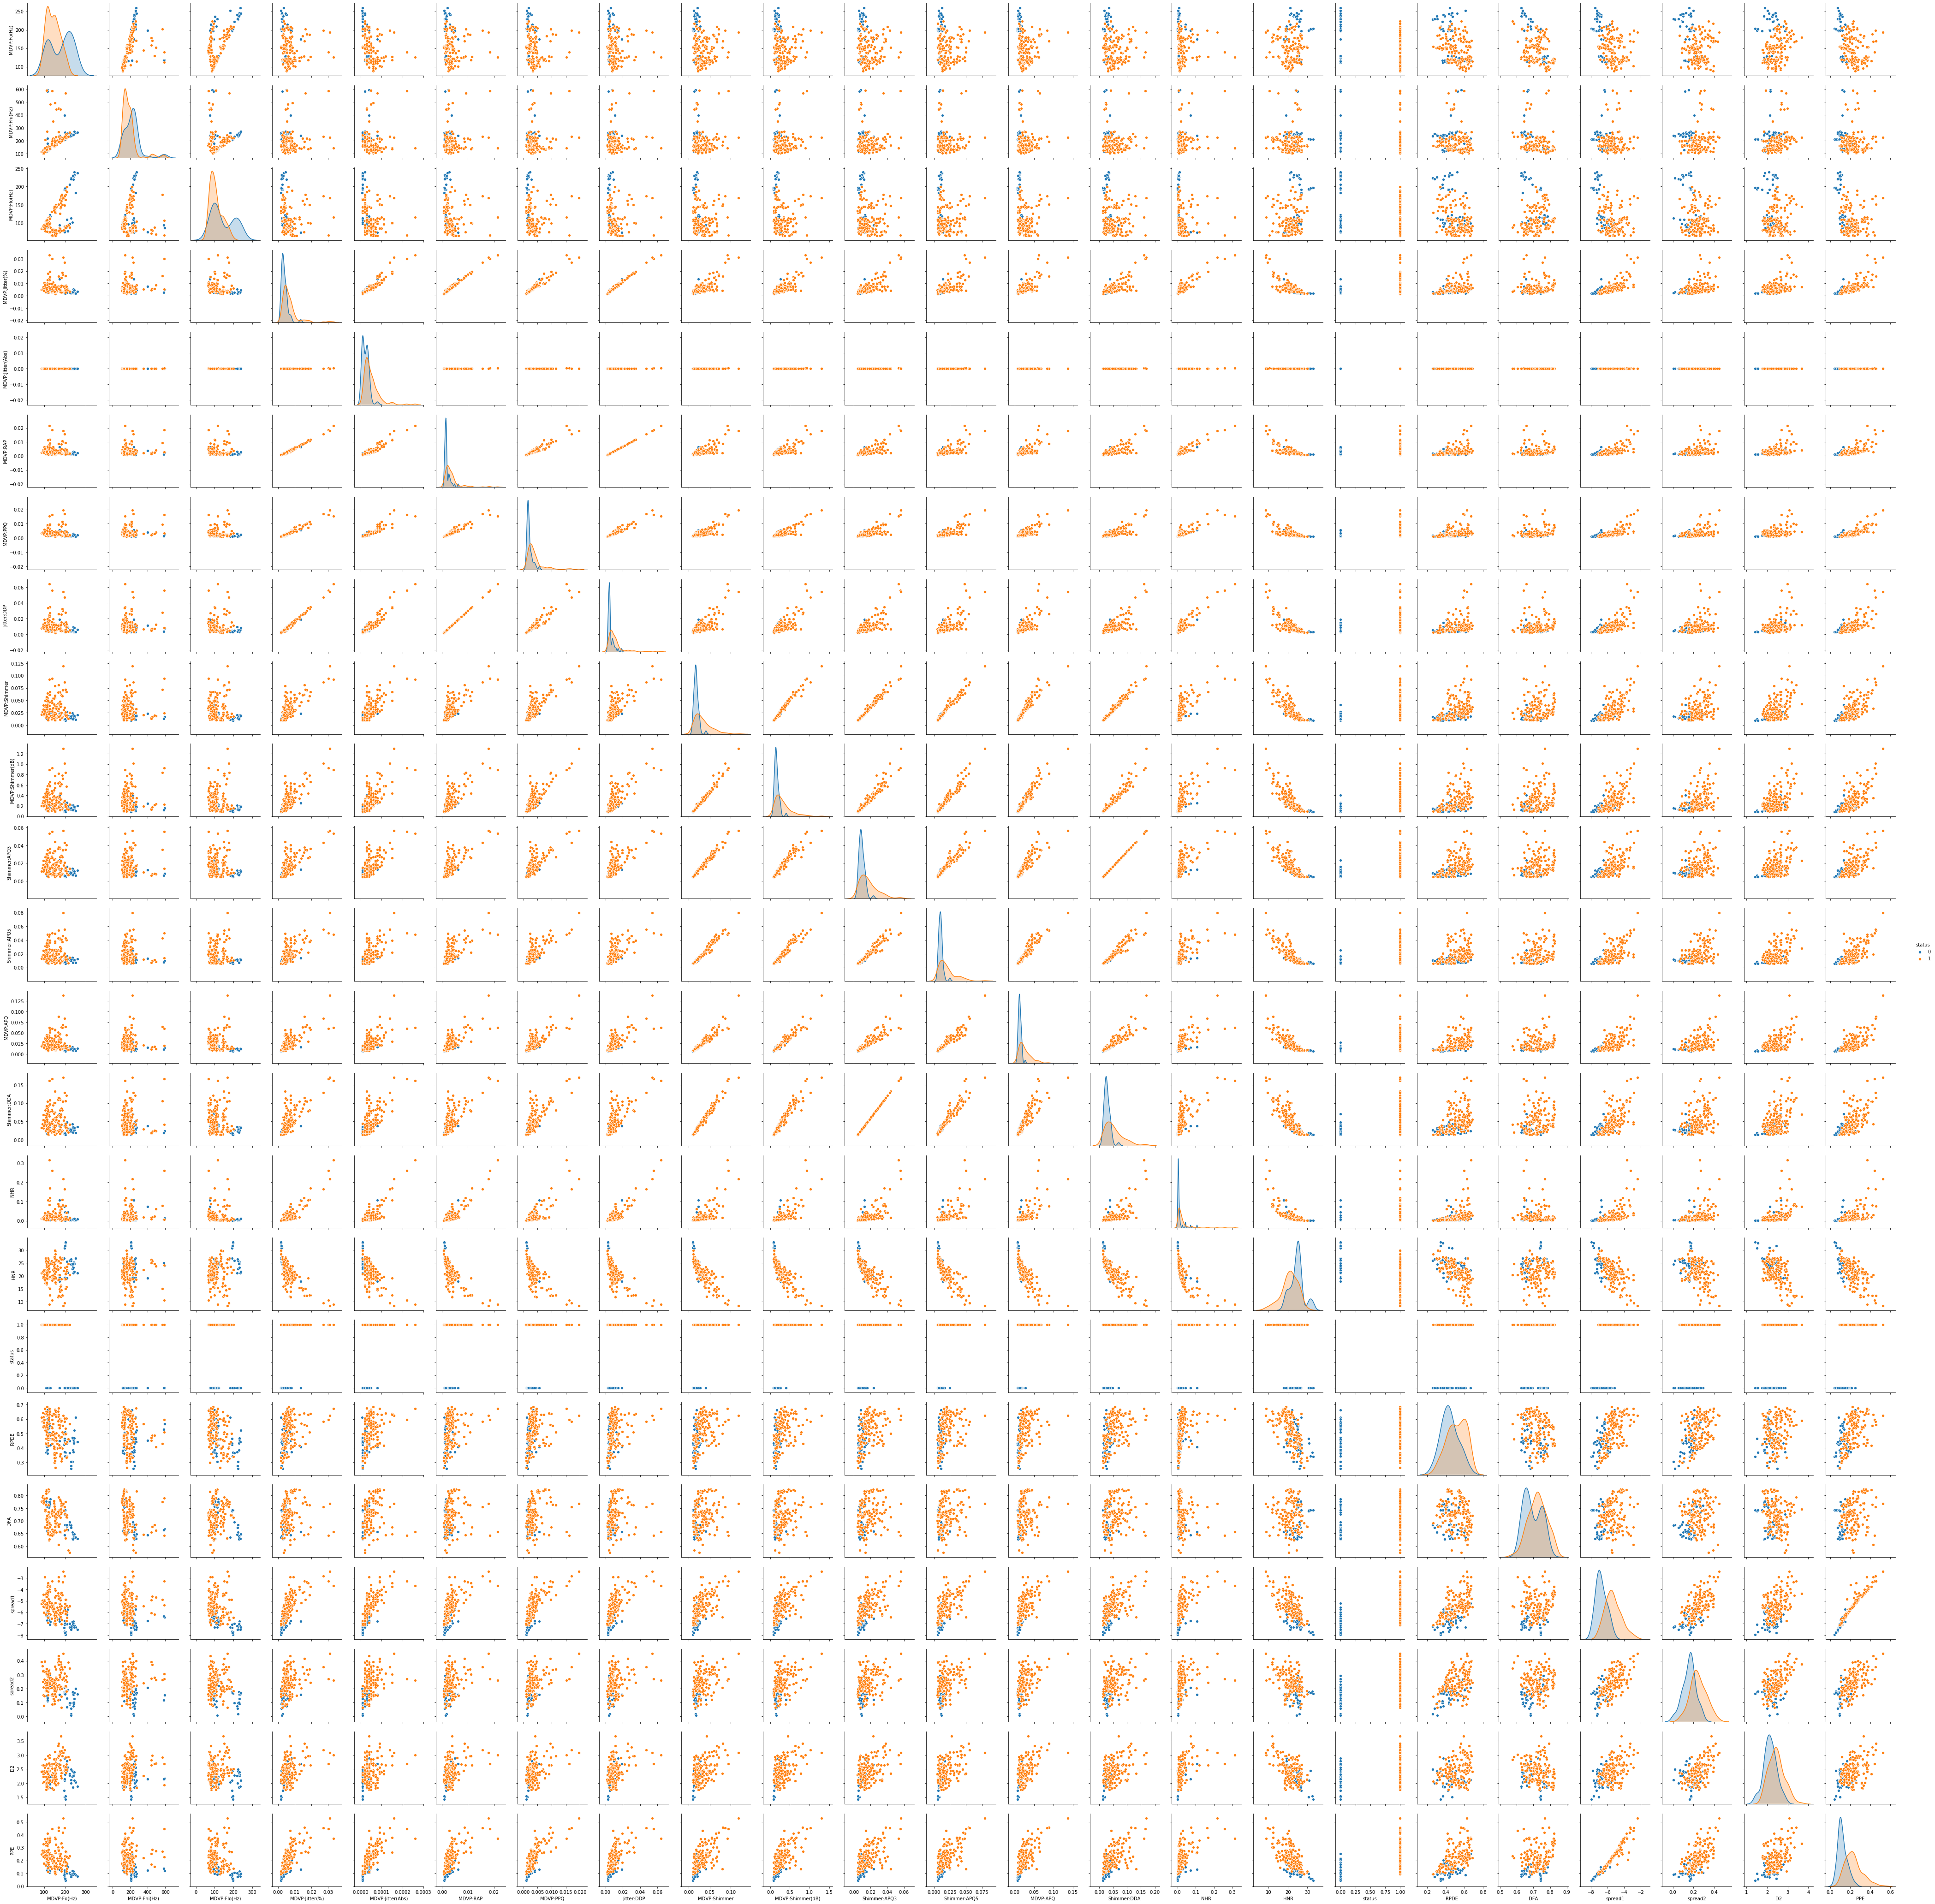

In [14]:
# Bi-variate Analysis
sns.pairplot(Parkinsons_df, diag_kind = 'kde', hue = 'status')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

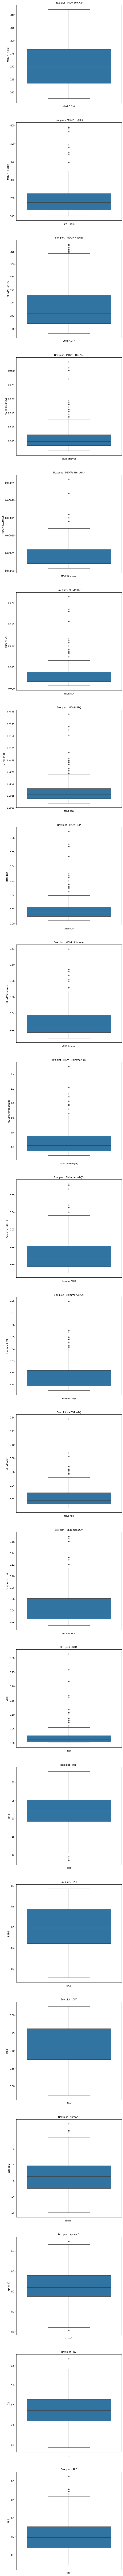

In [15]:
# Finding Outliers for treatment - Box Plot
col_names = Parkinsons_df.select_dtypes(include=[np.float64]).columns
fig, ax = plt.subplots(len(col_names), figsize=(8,200))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=Parkinsons_df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

<IPython.core.display.Javascript object>

List of Outliers detected for - MDVP:Fo(Hz) 
  Series([], Name: MDVP:Fo(Hz), dtype: float64)
List of Outliers detected for - MDVP:Fhi(Hz) 
  73     588.518
102    586.567
115    492.892
116    442.557
117    450.247
118    442.824
120    479.697
149    565.740
186    592.030
187    581.289
193    396.961
Name: MDVP:Fhi(Hz), dtype: float64
List of Outliers detected for - MDVP:Flo(Hz) 
  42     225.227
43     232.483
44     232.435
45     227.911
46     231.848
63     223.634
166    229.256
167    237.303
170    239.170
Name: MDVP:Flo(Hz), dtype: float64
List of Outliers detected for - MDVP:Jitter(%) 
  98     0.01378
99     0.01936
100    0.03316
101    0.01551
102    0.03011
146    0.01568
147    0.01466
148    0.01719
149    0.01627
150    0.01872
151    0.03107
152    0.02714
157    0.01813
192    0.01360
Name: MDVP:Jitter(%), dtype: float64
List of Outliers detected for - MDVP:Jitter(Abs) 
  99     0.00015
100    0.00026
102    0.00022
151    0.00016
152    0.00014
157    0.00015
Na

<IPython.core.display.Javascript object>

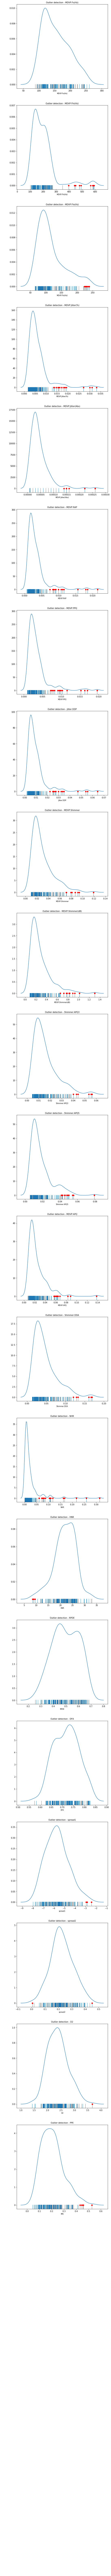

In [16]:
# IQR based outlier identification - Distplot
def IQR_based_outlier(data, threshold = 1.5):
    IQR = np.quantile(data, 0.75) - np.quantile(data, 0.25)
    minval = np.quantile(data,0.25) - IQR * threshold
    maxval = np.quantile(data,0.75) + IQR * threshold
    return (data < minval)|(data > maxval)

col_names = Parkinsons_df.select_dtypes(include=[np.float64]).columns

fig, ax = plt.subplots(len(col_names), figsize=(8,200))

for i, col_val in enumerate(col_names):
    x = Parkinsons_df[col_val][:1000]
    sns.distplot(x, ax=ax[i], rug=True, hist=False)
    outliers = x[IQR_based_outlier(x)]
    print('List of Outliers detected for - {} \n '.format(col_val),outliers)
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [17]:
''' The strategy to be followed for Outlier - Treatment,should be taken based on domain expert advice

Imputing Median Values for all the right-skewed distribution/ Imputing mean values of the Outliers can be one

col_names = Parkinsons_df.select_dtypes(include=[np.float64]).columns

for i, col_val in enumerate(col_names):
    median = Parkinsons_df[col_val].median()
    Parkinsons_df[IQR_based_outlier(Parkinsons_df[col_val])][col_val] = median'''

' The strategy to be followed for Outlier - Treatment,should be taken based on domain expert advice\n\nImputing Median Values for all the right-skewed distribution/ Imputing mean values of the Outliers can be one\n\ncol_names = Parkinsons_df.select_dtypes(include=[np.float64]).columns\n\nfor i, col_val in enumerate(col_names):\n    median = Parkinsons_df[col_val].median()\n    Parkinsons_df[IQR_based_outlier(Parkinsons_df[col_val])][col_val] = median'

In [18]:
Parkinsons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null float64
D2                  195 non-null flo

In [38]:
Pd_target_df = Parkinsons_df['status'] # Target Variable
Pd_features_df = Parkinsons_df.drop('status', axis =1)

In [39]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
Pd_features_df = pd.DataFrame(SC.fit_transform(Pd_features_df))

In [40]:
from sklearn.model_selection import train_test_split
X = np.array(Pd_features_df)
y = np.array(Pd_target_df)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10) # split 70:30

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

In [43]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [44]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

train_char_label = ['0', '1']
PD_tree_file = open('D:\Pd_tree.dot','w')
names = Pd_features_df.columns.values
dot_data = tree.export_graphviz(dt_model, out_file= PD_tree_file, feature_names = names, class_names = list(train_char_label))

PD_tree_file.close()


# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = Pd_features_df.columns))

         Imp
0   0.078002
1   0.087232
2   0.000000
3   0.000000
4   0.000000
5   0.000000
6   0.000000
7   0.000000
8   0.000000
9   0.000000
10  0.080699
11  0.000000
12  0.117714
13  0.109841
14  0.033719
15  0.000000
16  0.139020
17  0.000000
18  0.000000
19  0.000000
20  0.079160
21  0.274612


In [45]:
def printModelMetrics(model, trainscore,testscore):
    print('\n The training accuracy for {} is {}'.format(model, trainscore))
    print('\n The testing accuracy for {} is {}'.format(model, testscore))
    print('\n Confusion Matrix: \n')
    print(metrics.confusion_matrix(y_test, y_predict))
    print('\n Classification Report for Prediction: \n')
    print(metrics.classification_report(y_test, y_predict))
    print('\n F1 Scores for Prediction: \n')
    print(f1_score(y_test, y_predict, average=None))

In [46]:
y_predict = dt_model.predict(X_test)

In [47]:
# calculate accuracy measures and confusion matrix
DT_train_score = dt_model.score(X_train , y_train)
DT_test_score = dt_model.score(X_test , y_test)
printModelMetrics('Decision Tree Classifier', DT_train_score, DT_test_score)


 The training accuracy for Decision Tree Classifier is 1.0

 The testing accuracy for Decision Tree Classifier is 0.9491525423728814

 Confusion Matrix: 

[[15  1]
 [ 2 41]]

 Classification Report for Prediction: 

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.98      0.95      0.96        43

    accuracy                           0.95        59
   macro avg       0.93      0.95      0.94        59
weighted avg       0.95      0.95      0.95        59


 F1 Scores for Prediction: 

[0.90909091 0.96470588]


In [33]:
# regularizing the tree
reg_dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_leaf = 1, random_state = 10)
reg_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [34]:
y_predict = reg_dt_model.predict(X_test)

In [35]:
Reg_DT_train_score = reg_dt_model.score(X_train , y_train)
Reg_DT_test_score = reg_dt_model.score(X_test , y_test)
printModelMetrics('Regularized Decision Tree Classifier', Reg_DT_train_score, Reg_DT_test_score)


 The training accuracy for Regularized Decision Tree Classifier is 0.9117647058823529

 The testing accuracy for Regularized Decision Tree Classifier is 0.8983050847457628

 Confusion Matrix: 

[[15  1]
 [ 5 38]]

 Classification Report for Prediction: 

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.97      0.88      0.93        43

    accuracy                           0.90        59
   macro avg       0.86      0.91      0.88        59
weighted avg       0.91      0.90      0.90        59


 F1 Scores for Prediction: 

[0.83333333 0.92682927]


In [36]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 40, max_depth =3, min_samples_leaf = 1, random_state = 10)
rfcl = rfcl.fit(X_train, y_train)

In [37]:
y_predict = rfcl.predict(X_test)
rfcl_train_score = rfcl.score(X_train , y_train)
rfcl_test_score = rfcl.score(X_test , y_test)
printModelMetrics('Random Forest Classifier', rfcl_train_score, rfcl_test_score)


 The training accuracy for Random Forest Classifier is 0.9632352941176471

 The testing accuracy for Random Forest Classifier is 0.9322033898305084

 Confusion Matrix: 

[[12  4]
 [ 0 43]]

 Classification Report for Prediction: 

              precision    recall  f1-score   support

           0       1.00      0.75      0.86        16
           1       0.91      1.00      0.96        43

    accuracy                           0.93        59
   macro avg       0.96      0.88      0.91        59
weighted avg       0.94      0.93      0.93        59


 F1 Scores for Prediction: 

[0.85714286 0.95555556]
